## **Time Series Weather Forecasting**

In [1]:
import os # for file management
import datetime # for time management
import pandas as pd # for manipulating data
import numpy as np # for mathematical operations
import matplotlib as mpl # base plotting library
import matplotlib.pyplot as plt # for plotting
import seaborn as sns # for advanced data visualization
import tensorflow as tf # for deep learning

In [2]:
# managing figure size in the begining
mpl.rcParams['figure.figsize'] = (10, 6) # setting figure size
mpl.rcParams['axes.grid'] = False # removing gridlines from the plot

### **Import Weather Dataset**

In [3]:
zip_path = tf.keras.utils.get_file(  # downloading the dataset
    origin='https://storage.googleapis.com/tensorflow/tf-keras-datasets/jena_climate_2009_2016.csv.zip', # file location
    fname='jena_climate_2009_2016.csv.zip', # file name
    extract=True # extracting the contents of the zip file
)

In [4]:
csv_path, _ = os.path.splitext(zip_path) # getting the csv file path 

In [5]:
# read the data in pandas dataframe
df = pd.read_csv(csv_path) # reading the csv file
df.head() # showing the first five rows of the dataframe

Date Time  p (mbar)  T (degC)  Tpot (K)  Tdew (degC)  rh (%)  \
0  01.01.2009 00:10:00    996.52     -8.02    265.40        -8.90    93.3   
1  01.01.2009 00:20:00    996.57     -8.41    265.01        -9.28    93.4   
2  01.01.2009 00:30:00    996.53     -8.51    264.91        -9.31    93.9   
3  01.01.2009 00:40:00    996.51     -8.31    265.12        -9.07    94.2   
4  01.01.2009 00:50:00    996.51     -8.27    265.15        -9.04    94.1   

   VPmax (mbar)  VPact (mbar)  VPdef (mbar)  sh (g/kg)  H2OC (mmol/mol)  \
0          3.33          3.11          0.22       1.94             3.12   
1          3.23          3.02          0.21       1.89             3.03   
2          3.21          3.01          0.20       1.88             3.02   
3          3.26          3.07          0.19       1.92             3.08   
4          3.27          3.08          0.19       1.92             3.09   

   rho (g/m**3)  wv (m/s)  max. wv (m/s)  wd (deg)  
0       1307.75      1.03           1.75     152.3  
1       1309.80      0.72           1.50     136.1  
2       1310.24      0.19           0.63     171.6  
3       1309.19      0.34           0.50     198.0  
4       1309.00      0.32           0.63     214.3

In [6]:
# write csv file
df.to_csv('jena_climate_2009_2016.csv', index=False) # writing the csv file

In [7]:
df.describe() # getting the summary of the dataframe

p (mbar)       T (degC)       Tpot (K)    Tdew (degC)  \
count  420551.000000  420551.000000  420551.000000  420551.000000   
mean      989.212776       9.450147     283.492743       4.955854   
std         8.358481       8.423365       8.504471       6.730674   
min       913.600000     -23.010000     250.600000     -25.010000   
25%       984.200000       3.360000     277.430000       0.240000   
50%       989.580000       9.420000     283.470000       5.220000   
75%       994.720000      15.470000     289.530000      10.070000   
max      1015.350000      37.280000     311.340000      23.110000   

              rh (%)   VPmax (mbar)   VPact (mbar)   VPdef (mbar)  \
count  420551.000000  420551.000000  420551.000000  420551.000000   
mean       76.008259      13.576251       9.533756       4.042412   
std        16.476175       7.739020       4.184164       4.896851   
min        12.950000       0.950000       0.790000       0.000000   
25%        65.210000       7.780000       6.210000       0.870000   
50%        79.300000      11.820000       8.860000       2.190000   
75%        89.400000      17.600000      12.350000       5.300000   
max       100.000000      63.770000      28.320000      46.010000   

           sh (g/kg)  H2OC (mmol/mol)   rho (g/m**3)       wv (m/s)  \
count  420551.000000    420551.000000  420551.000000  420551.000000   
mean        6.022408         9.640223    1216.062748       1.702224   
std         2.656139         4.235395      39.975208      65.446714   
min         0.500000         0.800000    1059.450000   -9999.000000   
25%         3.920000         6.290000    1187.490000       0.990000   
50%         5.590000         8.960000    1213.790000       1.760000   
75%         7.800000        12.490000    1242.770000       2.860000   
max        18.130000        28.820000    1393.540000      28.490000   

       max. wv (m/s)       wd (deg)  
count  420551.000000  420551.000000  
mean        3.056555     174.743738  
std        69.016932      86.681693  
min     -9999.000000       0.000000  
25%         1.760000     124.900000  
50%         2.960000     198.100000  
75%         4.740000     234.100000  
max        23.500000     360.000000

In [8]:
df.describe().transpose() # getting the summary of the dataframe or transpose of the summary is .T

count         mean        std      min      25%      50%  \
p (mbar)         420551.0   989.212776   8.358481   913.60   984.20   989.58   
T (degC)         420551.0     9.450147   8.423365   -23.01     3.36     9.42   
Tpot (K)         420551.0   283.492743   8.504471   250.60   277.43   283.47   
Tdew (degC)      420551.0     4.955854   6.730674   -25.01     0.24     5.22   
rh (%)           420551.0    76.008259  16.476175    12.95    65.21    79.30   
VPmax (mbar)     420551.0    13.576251   7.739020     0.95     7.78    11.82   
VPact (mbar)     420551.0     9.533756   4.184164     0.79     6.21     8.86   
VPdef (mbar)     420551.0     4.042412   4.896851     0.00     0.87     2.19   
sh (g/kg)        420551.0     6.022408   2.656139     0.50     3.92     5.59   
H2OC (mmol/mol)  420551.0     9.640223   4.235395     0.80     6.29     8.96   
rho (g/m**3)     420551.0  1216.062748  39.975208  1059.45  1187.49  1213.79   
wv (m/s)         420551.0     1.702224  65.446714 -9999.00     0.99     1.76   
max. wv (m/s)    420551.0     3.056555  69.016932 -9999.00     1.76     2.96   
wd (deg)         420551.0   174.743738  86.681693     0.00   124.90   198.10   

                     75%      max  
p (mbar)          994.72  1015.35  
T (degC)           15.47    37.28  
Tpot (K)          289.53   311.34  
Tdew (degC)        10.07    23.11  
rh (%)             89.40   100.00  
VPmax (mbar)       17.60    63.77  
VPact (mbar)       12.35    28.32  
VPdef (mbar)        5.30    46.01  
sh (g/kg)           7.80    18.13  
H2OC (mmol/mol)    12.49    28.82  
rho (g/m**3)     1242.77  1393.54  
wv (m/s)            2.86    28.49  
max. wv (m/s)       4.74    23.50  
wd (deg)          234.10   360.00

In [9]:
df.shape # getting the shape of the dataframe

(420551, 15)

In [10]:
420551*15 # getting the total number of values in the dataframe

6308265

In [11]:
df.info() # getting the information about the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420551 entries, 0 to 420550
Data columns (total 15 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Date Time        420551 non-null  object 
 1   p (mbar)         420551 non-null  float64
 2   T (degC)         420551 non-null  float64
 3   Tpot (K)         420551 non-null  float64
 4   Tdew (degC)      420551 non-null  float64
 5   rh (%)           420551 non-null  float64
 6   VPmax (mbar)     420551 non-null  float64
 7   VPact (mbar)     420551 non-null  float64
 8   VPdef (mbar)     420551 non-null  float64
 9   sh (g/kg)        420551 non-null  float64
 10  H2OC (mmol/mol)  420551 non-null  float64
 11  rho (g/m**3)     420551 non-null  float64
 12  wv (m/s)         420551 non-null  float64
 13  max. wv (m/s)    420551 non-null  float64
 14  wd (deg)         420551 non-null  float64
dtypes: float64(14), object(1)
memory usage: 48.1+ MB


In [12]:
df.head(n=100) # getting the first 100 rows of the dataframe or .head(100)

Date Time  p (mbar)  T (degC)  Tpot (K)  Tdew (degC)  rh (%)  \
0   01.01.2009 00:10:00    996.52     -8.02    265.40        -8.90    93.3   
1   01.01.2009 00:20:00    996.57     -8.41    265.01        -9.28    93.4   
2   01.01.2009 00:30:00    996.53     -8.51    264.91        -9.31    93.9   
3   01.01.2009 00:40:00    996.51     -8.31    265.12        -9.07    94.2   
4   01.01.2009 00:50:00    996.51     -8.27    265.15        -9.04    94.1   
..                  ...       ...       ...       ...          ...     ...   
95  01.01.2009 16:00:00    999.94     -5.40    267.76        -6.86    89.4   
96  01.01.2009 16:10:00   1000.05     -5.31    267.85        -6.69    89.9   
97  01.01.2009 16:20:00   1000.05     -5.28    267.88        -6.68    89.8   
98  01.01.2009 16:30:00   1000.10     -5.32    267.83        -6.77    89.5   
99  01.01.2009 16:40:00   1000.17     -5.29    267.86        -6.70    89.7   

    VPmax (mbar)  VPact (mbar)  VPdef (mbar)  sh (g/kg)  H2OC (mmol/mol)  \
0           3.33          3.11          0.22       1.94             3.12   
1           3.23          3.02          0.21       1.89             3.03   
2           3.21          3.01          0.20       1.88             3.02   
3           3.26          3.07          0.19       1.92             3.08   
4           3.27          3.08          0.19       1.92             3.09   
..           ...           ...           ...        ...              ...   
95          4.08          3.65          0.43       2.27             3.65   
96          4.11          3.69          0.42       2.30             3.69   
97          4.12          3.70          0.42       2.30             3.70   
98          4.11          3.67          0.43       2.29             3.67   
99          4.12          3.69          0.42       2.30             3.69   

    rho (g/m**3)  wv (m/s)  max. wv (m/s)  wd (deg)  
0        1307.75      1.03           1.75     152.3  
1        1309.80      0.72           1.50     136.1  
2        1310.24      0.19           0.63     171.6  
3        1309.19      0.34           0.50     198.0  
4        1309.00      0.32           0.63     214.3  
..           ...       ...            ...       ...  
95       1299.17      1.40           2.13     145.5  
96       1298.81      1.03           1.50     127.0  
97       1298.69      1.11           1.88     134.7  
98       1298.96      1.35           2.13     132.3  
99       1298.87      1.03           1.75     140.8  

[100 rows x 15 columns]

In [13]:
df.tail(100) # getting the last 100 rows of the dataframe or .tail(100)

Date Time  p (mbar)  T (degC)  Tpot (K)  Tdew (degC)  \
420451  31.12.2016 07:30:00   1006.34     -6.26    266.42        -9.32   
420452  31.12.2016 07:40:00   1006.26     -6.35    266.33        -8.62   
420453  31.12.2016 07:50:00   1006.29     -6.46    266.22        -8.80   
420454  31.12.2016 08:00:00   1006.28     -6.80    265.89        -8.85   
420455  31.12.2016 08:10:00   1006.22     -6.84    265.85        -8.71   
...                     ...       ...       ...       ...          ...   
420546  31.12.2016 23:20:00   1000.07     -4.05    269.10        -8.13   
420547  31.12.2016 23:30:00    999.93     -3.35    269.81        -8.06   
420548  31.12.2016 23:40:00    999.82     -3.16    270.01        -8.21   
420549  31.12.2016 23:50:00    999.81     -4.23    268.94        -8.53   
420550  01.01.2017 00:00:00    999.82     -4.82    268.36        -8.42   

        rh (%)  VPmax (mbar)  VPact (mbar)  VPdef (mbar)  sh (g/kg)  \
420451   78.70          3.82          3.01          0.81       1.86   
420452   83.80          3.79          3.18          0.61       1.97   
420453   83.30          3.76          3.13          0.63       1.94   
420454   85.20          3.67          3.12          0.54       1.93   
420455   86.40          3.65          3.16          0.50       1.95   
...        ...           ...           ...           ...        ...   
420546   73.10          4.52          3.30          1.22       2.06   
420547   69.71          4.77          3.32          1.44       2.07   
420548   67.91          4.84          3.28          1.55       2.05   
420549   71.80          4.46          3.20          1.26       1.99   
420550   75.70          4.27          3.23          1.04       2.01   

        H2OC (mmol/mol)  rho (g/m**3)  wv (m/s)  max. wv (m/s)  wd (deg)  
420451             2.99       1311.97      1.20           1.68     163.9  
420452             3.16       1312.27      0.60           1.16     145.7  
420453             3.11       1312.85      0.50           1.04     184.1  
420454             3.10       1314.51      0.74           1.76     178.1  
420455             3.14       1314.62      0.95           1.90     181.1  
...                 ...           ...       ...            ...       ...  
420546             3.30       1292.98      0.67           1.52     240.0  
420547             3.32       1289.44      1.14           1.92     234.3  
420548             3.28       1288.39      1.08           2.00     215.2  
420549             3.20       1293.56      1.49           2.16     225.8  
420550             3.23       1296.38      1.23           1.96     184.9  

[100 rows x 15 columns]

In [14]:
# print all the columns
pd.set_option('display.max_columns', None) # setting the maximum number of columns to display

In [15]:
# select the data based on the Date Time column for every 2 hours interval
# slice [start:stop:step], starting from index 5 take every 6th record.
df = df[11::12] # selecting the data based on the Date Time column for every 2 hours interval

In [16]:
df.head(10) # showing the first 10 rows of the dataframe

Date Time  p (mbar)  T (degC)  Tpot (K)  Tdew (degC)  rh (%)  \
11   01.01.2009 02:00:00    996.62     -8.88    264.54        -9.77    93.2   
23   01.01.2009 04:00:00    996.99     -9.05    264.34       -10.02    92.6   
35   01.01.2009 06:00:00    997.71     -9.67    263.66       -10.62    92.7   
47   01.01.2009 08:00:00    999.17     -8.10    265.12        -9.05    92.8   
59   01.01.2009 10:00:00   1000.27     -7.04    266.10        -8.17    91.6   
71   01.01.2009 12:00:00   1000.30     -6.87    266.27        -8.28    89.6   
83   01.01.2009 14:00:00    999.81     -5.94    267.24        -7.43    89.1   
95   01.01.2009 16:00:00    999.94     -5.40    267.76        -6.86    89.4   
107  01.01.2009 18:00:00   1000.16     -5.25    267.90        -6.75    89.1   
119  01.01.2009 20:00:00   1000.22     -4.90    268.24        -6.38    89.3   

     VPmax (mbar)  VPact (mbar)  VPdef (mbar)  sh (g/kg)  H2OC (mmol/mol)  \
11           3.12          2.90          0.21       1.81             2.91   
23           3.07          2.85          0.23       1.78             2.85   
35           2.93          2.71          0.21       1.69             2.72   
47           3.31          3.07          0.24       1.92             3.08   
59           3.60          3.30          0.30       2.05             3.29   
71           3.64          3.27          0.38       2.03             3.26   
83           3.92          3.49          0.43       2.17             3.49   
95           4.08          3.65          0.43       2.27             3.65   
107          4.13          3.68          0.45       2.29             3.68   
119          4.24          3.79          0.45       2.36             3.78   

     rho (g/m**3)  wv (m/s)  max. wv (m/s)  wd (deg)  
11        1312.25      0.25           0.63     190.3  
23        1313.61      0.10           0.38     240.0  
35        1317.71      0.05           0.50     146.0  
47        1311.65      0.72           1.25     213.9  
59        1307.76      1.45           3.00     292.6  
71        1306.98      1.84           2.63     184.4  
83        1301.67      1.25           2.00     144.0  
95        1299.17      1.40           2.13     145.5  
107       1298.68      0.55           1.00     183.7  
119       1297.05      0.68           1.13     195.2

In [17]:
df.shape # getting the shape of the dataframe

(35045, 15)

In [18]:
df_30=df[2::3] # selecting the data based on the Date Time column for every 30 minutes interval
df_30.head(10) # showing the first 10 rows of the dataframe

Date Time  p (mbar)  T (degC)  Tpot (K)  Tdew (degC)  rh (%)  \
35   01.01.2009 06:00:00    997.71     -9.67    263.66       -10.62    92.7   
71   01.01.2009 12:00:00   1000.30     -6.87    266.27        -8.28    89.6   
107  01.01.2009 18:00:00   1000.16     -5.25    267.90        -6.75    89.1   
143  02.01.2009 00:00:00    999.59     -4.54    268.65        -5.46    93.2   
179  02.01.2009 06:00:00    998.00     -4.43    268.88        -4.94    96.2   
215  02.01.2009 12:00:00    998.91     -3.12    270.13        -4.50    90.1   
251  02.01.2009 18:00:00   1000.74     -3.07    270.03        -4.14    92.3   
287  03.01.2009 00:00:00   1002.32     -4.71    268.27        -6.09    90.0   
323  03.01.2009 06:00:00   1001.29     -8.20    264.86        -9.05    93.5   
359  03.01.2009 12:00:00    999.02     -5.96    267.28        -8.72    80.7   

     VPmax (mbar)  VPact (mbar)  VPdef (mbar)  sh (g/kg)  H2OC (mmol/mol)  \
35           2.93          2.71          0.21       1.69             2.72   
71           3.64          3.27          0.38       2.03             3.26   
107          4.13          3.68          0.45       2.29             3.68   
143          4.36          4.06          0.30       2.53             4.06   
179          4.39          4.23          0.17       2.64             4.23   
215          4.85          4.37          0.48       2.73             4.38   
251          4.87          4.49          0.37       2.80             4.49   
287          4.30          3.87          0.43       2.41             3.86   
323          3.29          3.07          0.21       1.91             3.07   
359          3.91          3.16          0.75       1.97             3.16   

     rho (g/m**3)  wv (m/s)  max. wv (m/s)  wd (deg)  
35        1317.71      0.05           0.50    146.00  
71        1306.98      1.84           2.63    184.40  
107       1298.68      0.55           1.00    183.70  
143       1294.33      0.41           0.88    155.00  
179       1291.66      0.81           2.13     40.88  
215       1286.47      1.54           2.00    127.00  
251       1288.58      2.97           4.63     12.56  
287       1298.79      1.42           1.88     16.85  
323       1314.93      0.47           1.75    221.40  
359       1300.90      1.31           1.88    213.90

In [19]:
df_30.shape # getting the shape of the dataframe

(11681, 15)

In [20]:
date_time=pd.to_datetime(df.pop('Date Time'), format='%d.%m.%Y %H:%M:%S') # converting the Date Time column to datetime format

In [21]:
df.head() # showing the first five rows of the dataframe

p (mbar)  T (degC)  Tpot (K)  Tdew (degC)  rh (%)  VPmax (mbar)  \
11    996.62     -8.88    264.54        -9.77    93.2          3.12   
23    996.99     -9.05    264.34       -10.02    92.6          3.07   
35    997.71     -9.67    263.66       -10.62    92.7          2.93   
47    999.17     -8.10    265.12        -9.05    92.8          3.31   
59   1000.27     -7.04    266.10        -8.17    91.6          3.60   

    VPact (mbar)  VPdef (mbar)  sh (g/kg)  H2OC (mmol/mol)  rho (g/m**3)  \
11          2.90          0.21       1.81             2.91       1312.25   
23          2.85          0.23       1.78             2.85       1313.61   
35          2.71          0.21       1.69             2.72       1317.71   
47          3.07          0.24       1.92             3.08       1311.65   
59          3.30          0.30       2.05             3.29       1307.76   

    wv (m/s)  max. wv (m/s)  wd (deg)  
11      0.25           0.63     190.3  
23      0.10           0.38     240.0  
35      0.05           0.50     146.0  
47      0.72           1.25     213.9  
59      1.45           3.00     292.6

In [22]:
df.columns # getting the column names of the dataframe

Index(['p (mbar)', 'T (degC)', 'Tpot (K)', 'Tdew (degC)', 'rh (%)',
       'VPmax (mbar)', 'VPact (mbar)', 'VPdef (mbar)', 'sh (g/kg)',
       'H2OC (mmol/mol)', 'rho (g/m**3)', 'wv (m/s)', 'max. wv (m/s)',
       'wd (deg)'],
      dtype='object')

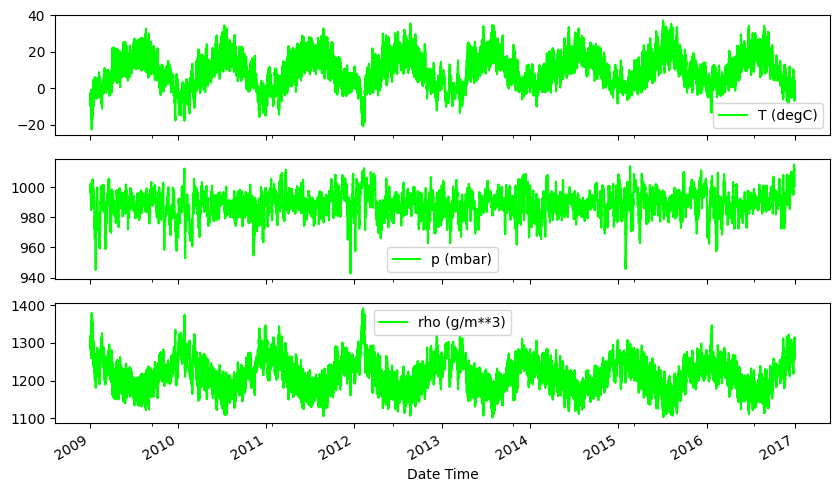

In [23]:
# let's plot the data
plot_cols=['T (degC)', 'p (mbar)', 'rho (g/m**3)'] # selecting the columns to plot
plot_features=df[plot_cols] # selecting the columns to plot
plot_features.index=date_time # setting the index of the dataframe
_ = plot_features.plot(subplots=True, color='lime') # plotting the data

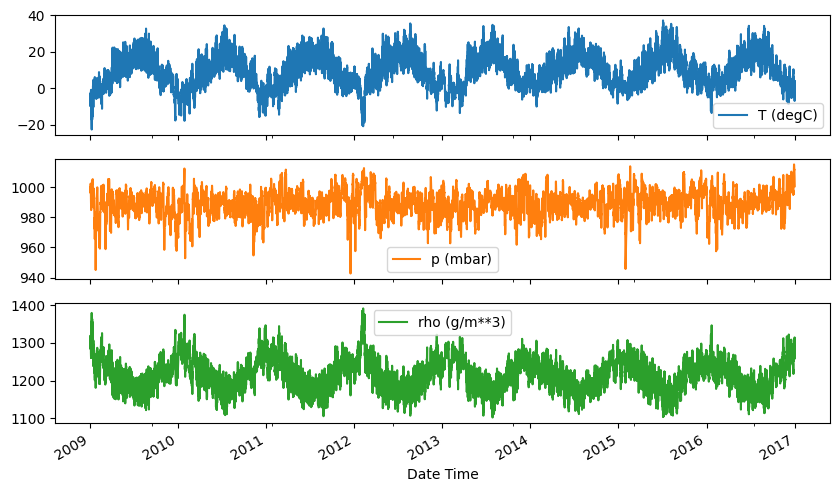

In [24]:
# let's plot the data
plot_cols=['T (degC)', 'p (mbar)', 'rho (g/m**3)'] # selecting the columns to plot
plot_features=df[plot_cols] # selecting the columns to plot
plot_features.index=date_time # setting the index of the dataframe
_ = plot_features.plot(subplots=True) # plotting the data

In [30]:
# let's make the same plots in plotly   
import plotly.express as px # for advanced data visualization
fig=px.line(df, x=date_time, y='T (degC)', title='Temperature over Time') # creating the plot
fig.show() # showing the plot
fig=px.line(df, x=date_time, y='p (mbar)', title='Pressure over Time') # creating the plot
fig.update_traces(line_color='lime') # updating the line color
fig.show() # showing the plot

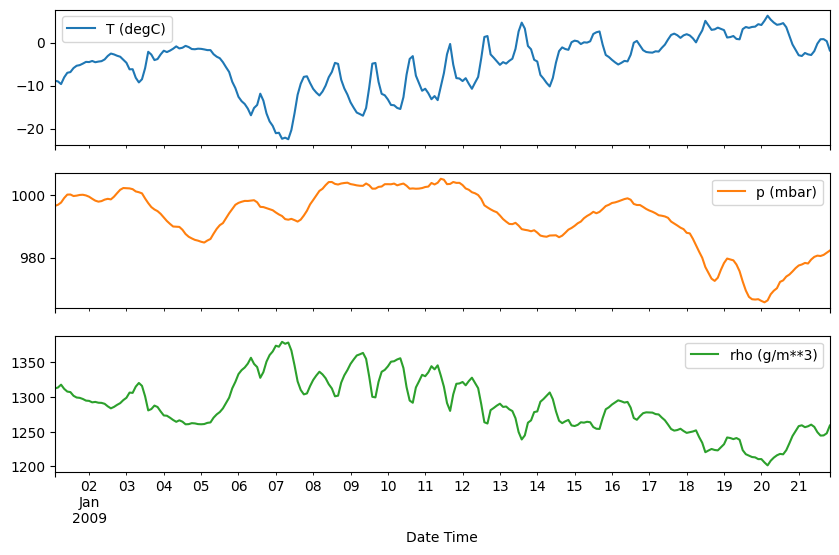

In [31]:
# first 500 hours of the data
plot_features=df[plot_cols][:250] # selecting the columns to plot
plot_features.index=date_time[:250] # setting the index of the dataframe
_ = plot_features.plot(subplots=True) # plotting the data

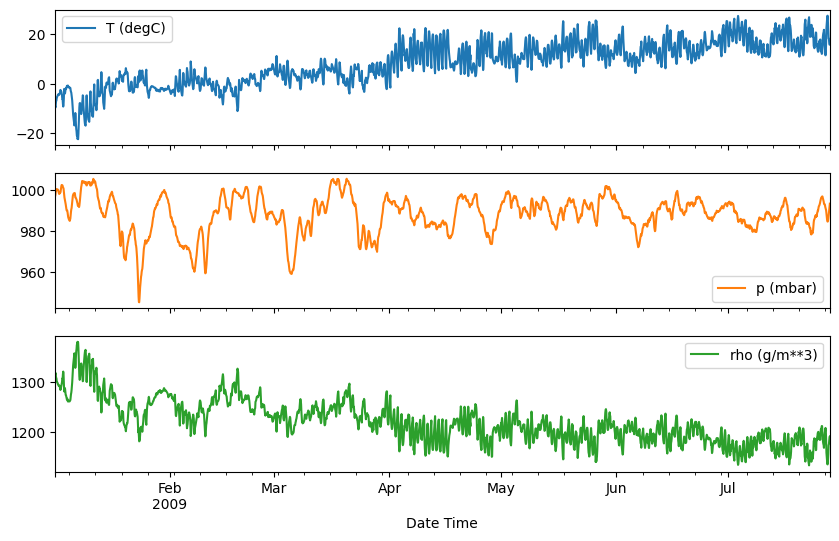

In [32]:
# first 5000 hours of the dataframe
plot_features=df[plot_cols][:2500] # selecting the columns to plot
plot_features.index=date_time[:2500] # setting the index of the dataframe
_ = plot_features.plot(subplots=True) # plotting the data

In [33]:
df.shape*2 # getting the total number of values in the dataframe

(35045, 14, 35045, 14)

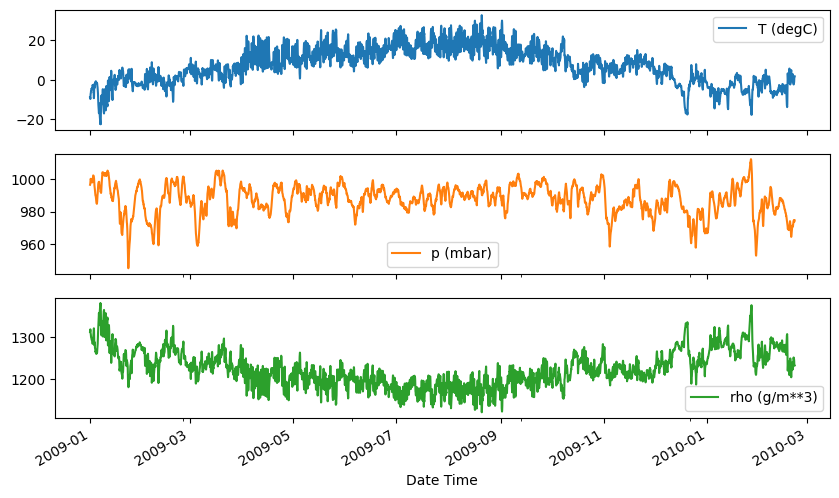

In [34]:
# lets plot only the 10000 hours of the data which is 5000 rows
plot_features=df[plot_cols][:5000] # selecting the columns to plot
plot_features.index=date_time[:5000] # setting the index of the dataframe
_ = plot_features.plot(subplots=True) # plotting the data

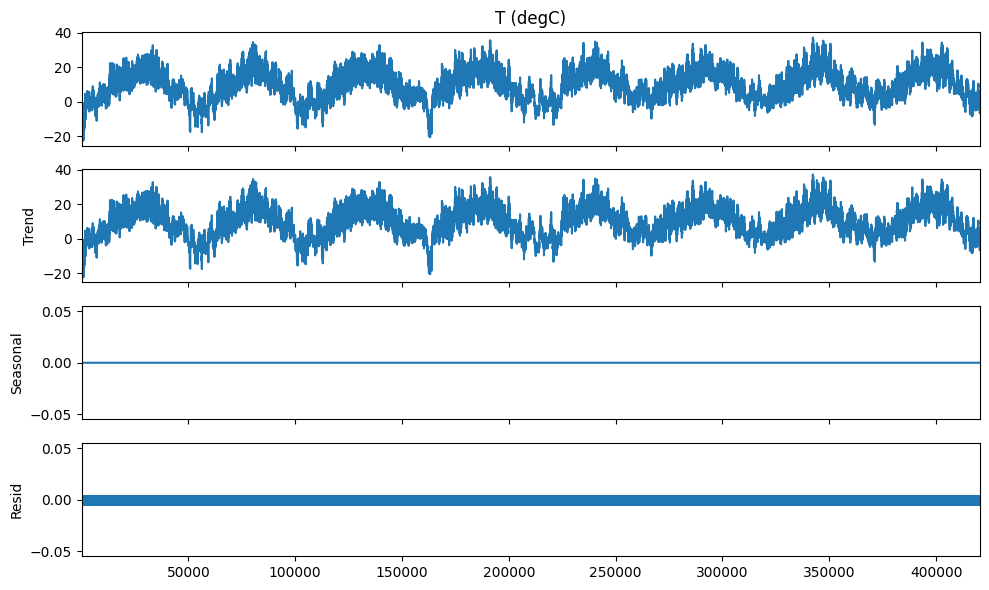

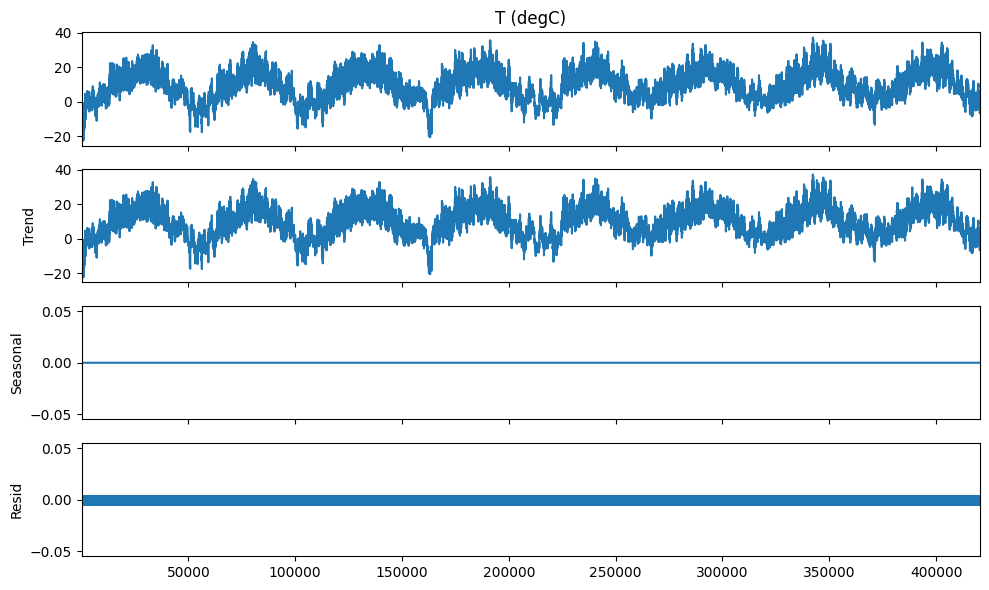

In [35]:
from statsmodels.tsa.seasonal import seasonal_decompose # for decomposing the data
decompose=seasonal_decompose(df['T (degC)'], model='additive', period=1) # decomposing the data
decompose.plot() # plotting the decomposed data

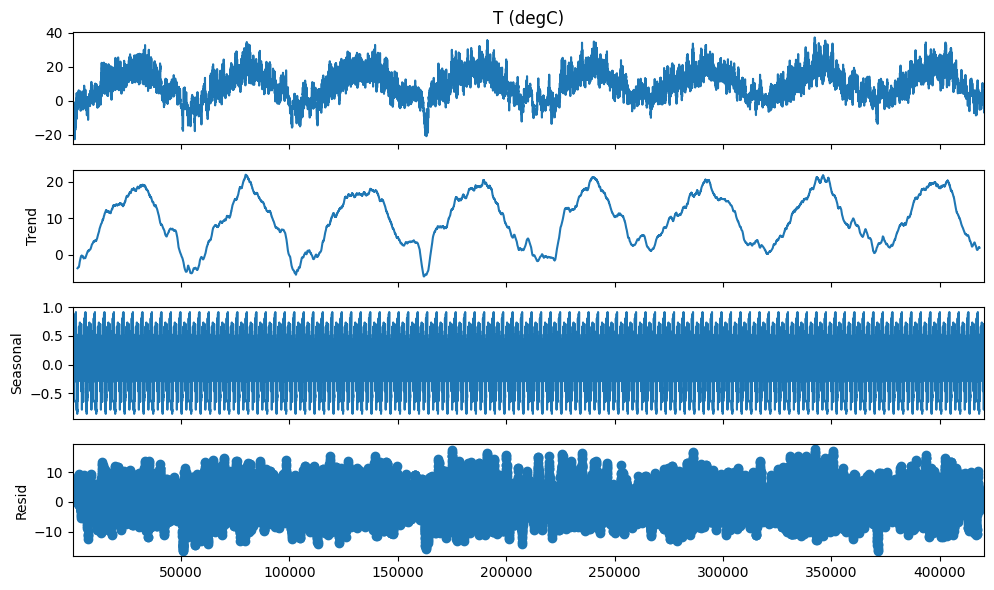

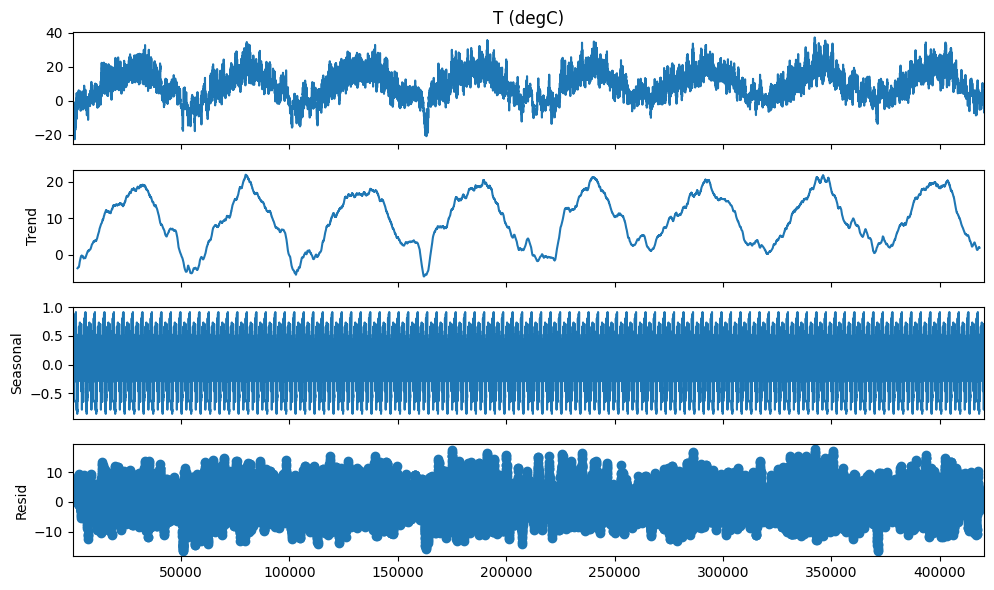

In [38]:
from statsmodels.tsa.seasonal import seasonal_decompose # for decomposing the data
decompose=seasonal_decompose(df['T (degC)'], model='additive', period=365) # decomposing the data
decompose.plot() # plotting the decomposed data

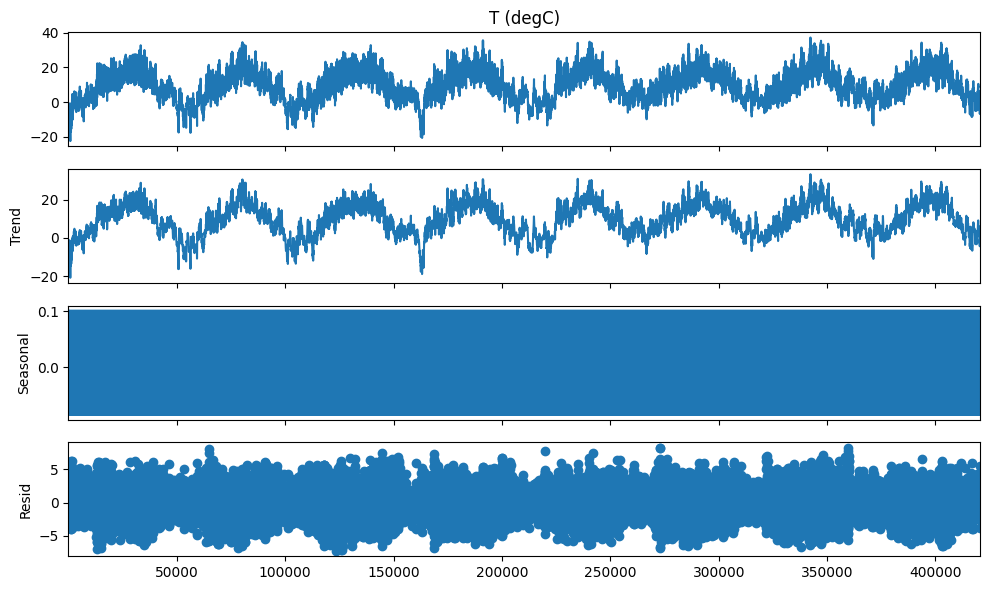

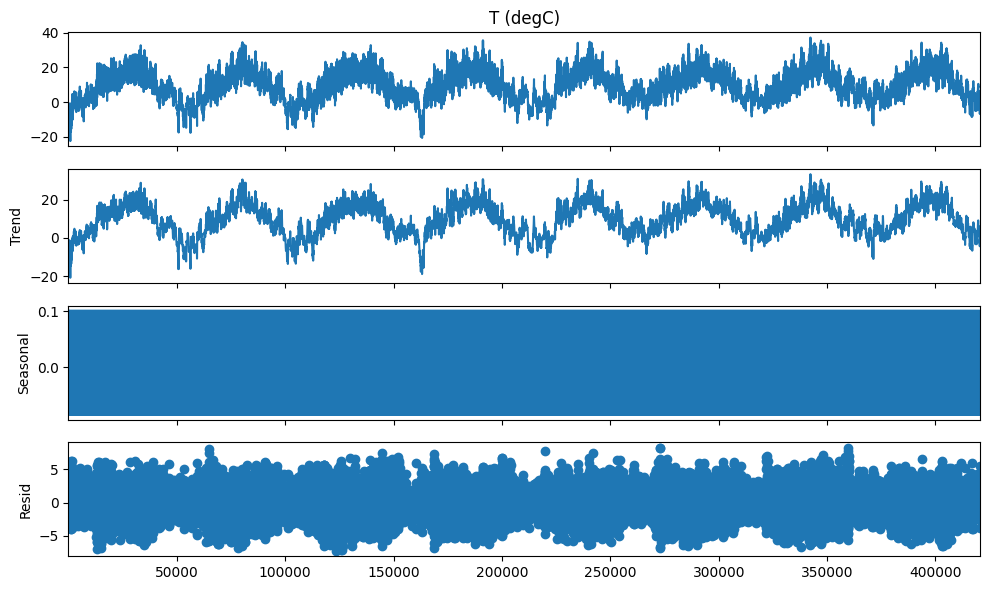

In [40]:
from statsmodels.tsa.seasonal import seasonal_decompose # for decomposing the data
decompose=seasonal_decompose(df['T (degC)'], model='additive', period=8) # decomposing the data
decompose.plot() # plotting the decomposed data

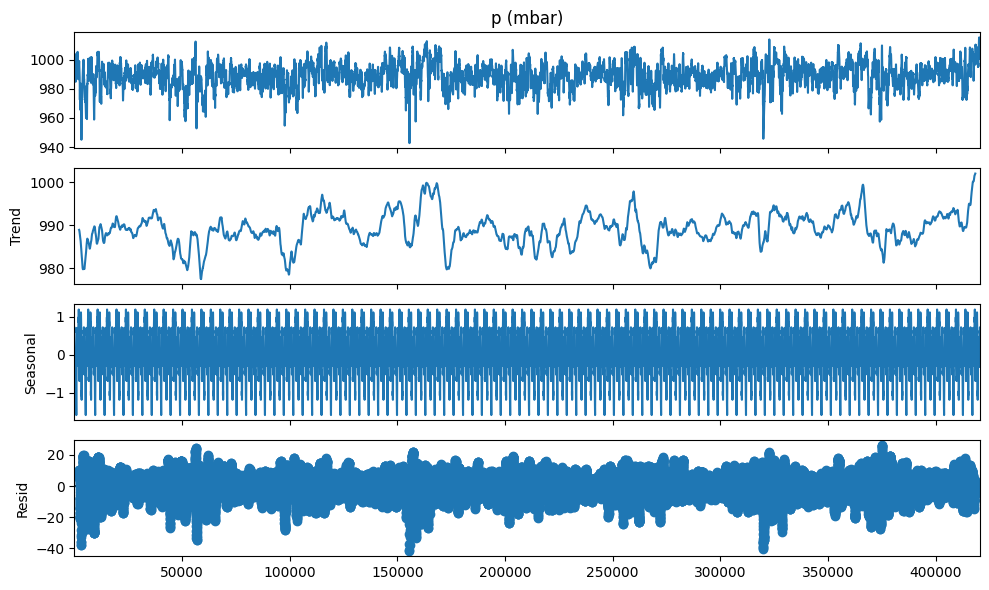

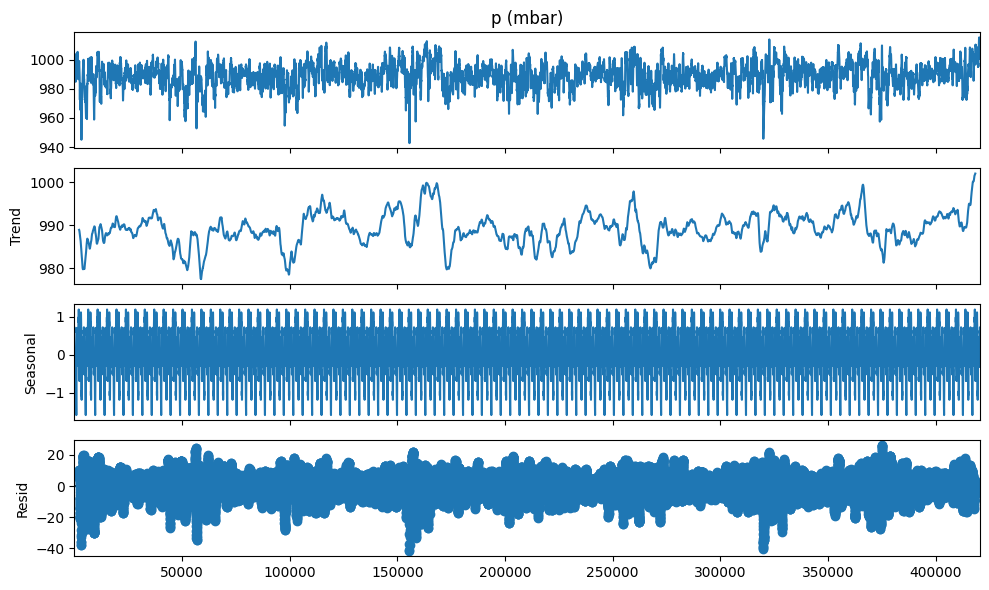

In [41]:
decompose=seasonal_decompose(df['p (mbar)'], model='additive', period=365) # decomposing the data
decompose.plot() # plotting the decomposed data

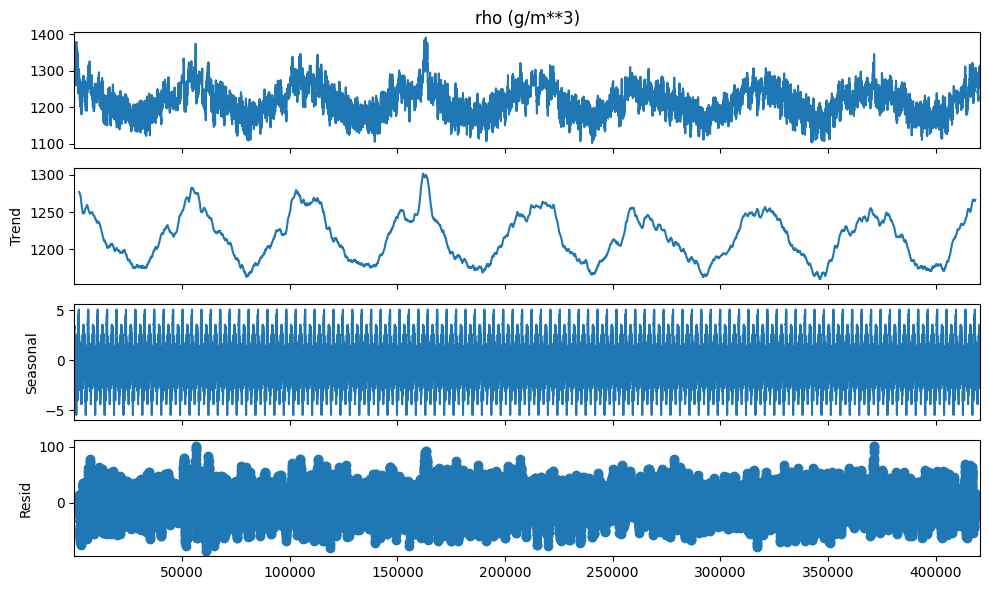

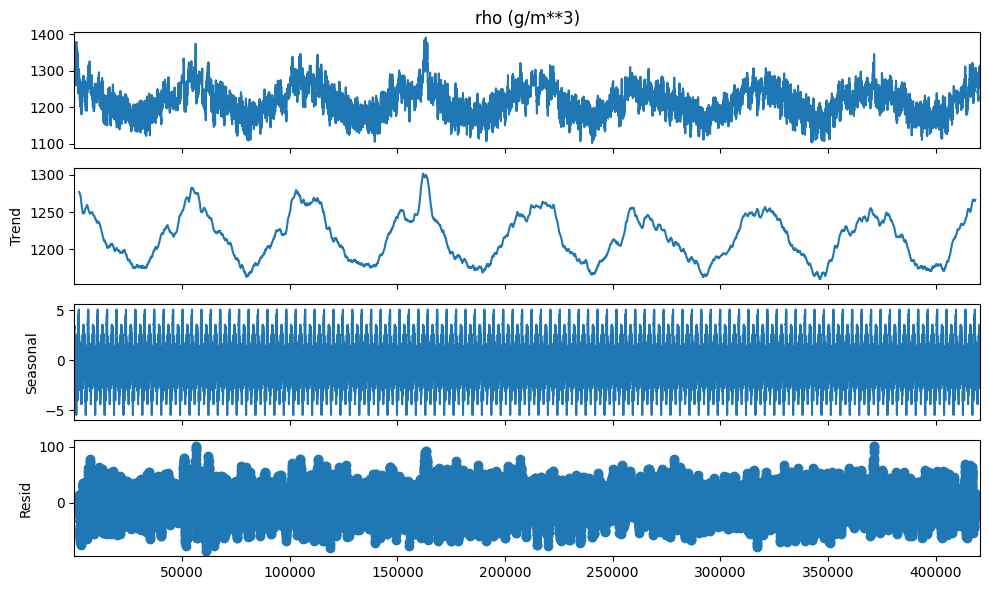

In [42]:
decompose=seasonal_decompose(df['rho (g/m**3)'], model='additive', period=365) # decomposing the data
decompose.plot() # plotting the decomposed data

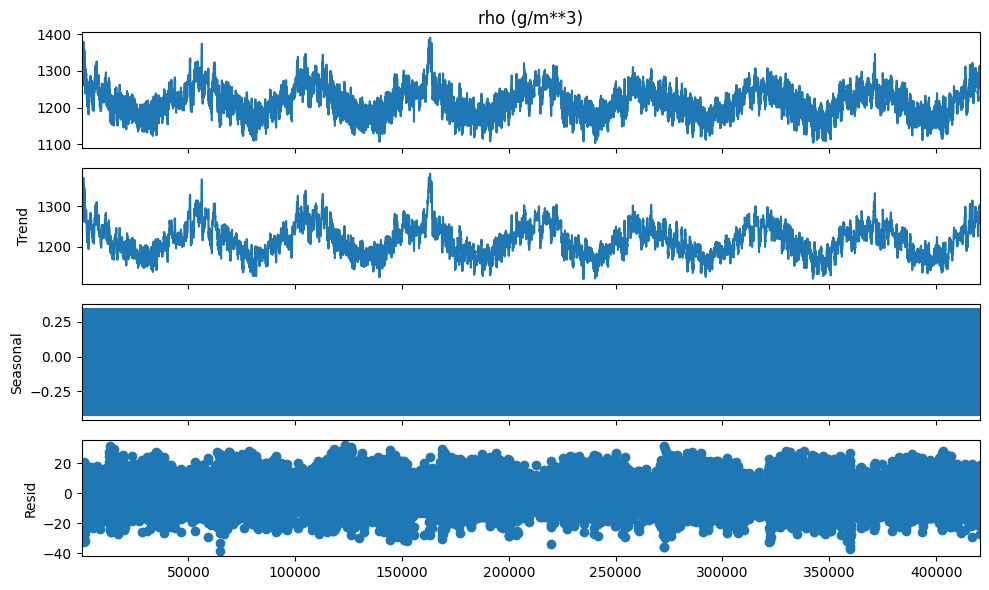

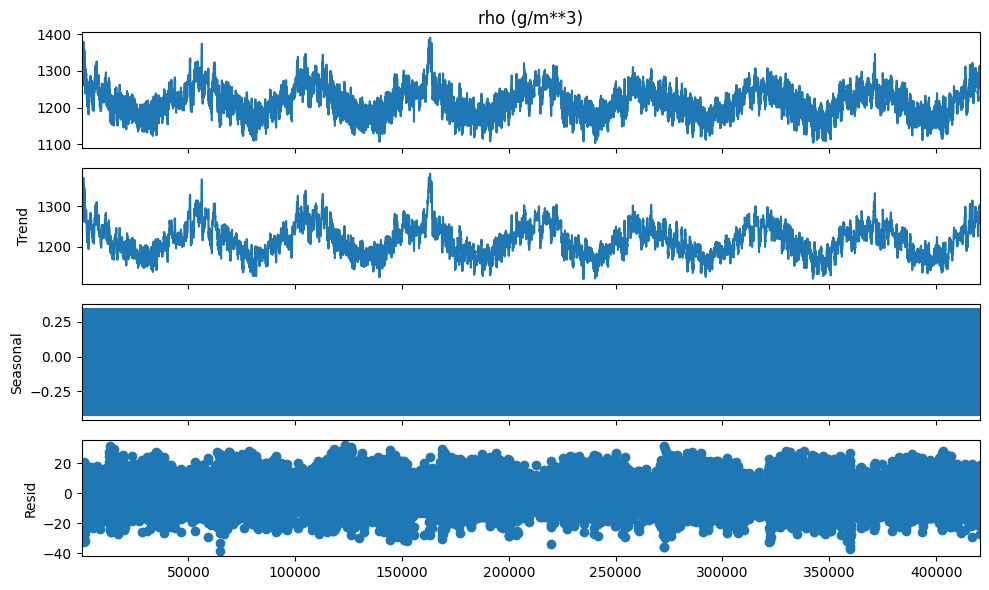

In [43]:
decompose=seasonal_decompose(df['rho (g/m**3)'], model='additive', period=8) # decomposing the data
decompose.plot() # plotting the decomposed data

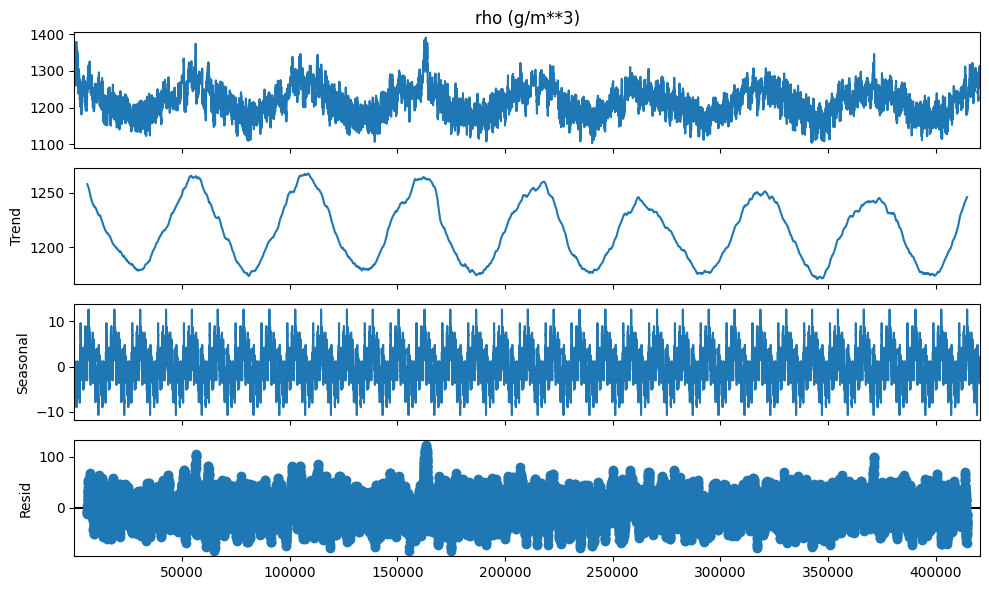

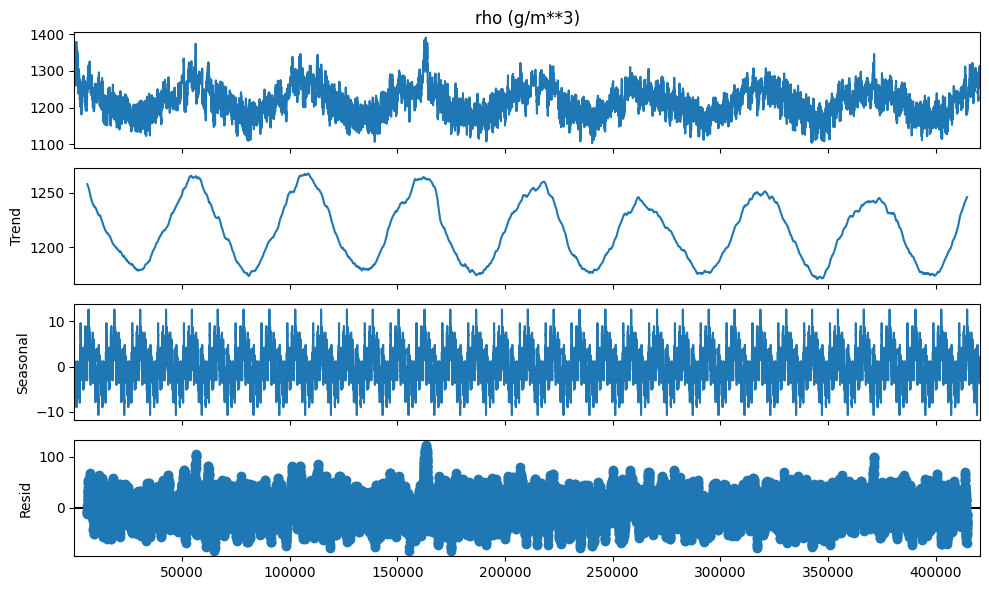

In [44]:
decompose=seasonal_decompose(df['rho (g/m**3)'], model='additive', period=1000) # decomposing the data
decompose.plot() # plotting the decomposed data

In [45]:
# clean up the data
# let's check if there are any null values in the dataset
df.isnull().sum() # checking for missing values, .isnull() returns True if there is a missing value and .sum() sums up all the missing values

p (mbar)           0
T (degC)           0
Tpot (K)           0
Tdew (degC)        0
rh (%)             0
VPmax (mbar)       0
VPact (mbar)       0
VPdef (mbar)       0
sh (g/kg)          0
H2OC (mmol/mol)    0
rho (g/m**3)       0
wv (m/s)           0
max. wv (m/s)      0
wd (deg)           0
dtype: int64

In [47]:
df.describe().T # getting the summary of the dataframe or transpose of the summary is .T

count         mean        std      min      25%      50%  \
p (mbar)         35045.0   989.213079   8.353850   942.65   984.20   989.57   
T (degC)         35045.0     9.450335   8.425301   -22.50     3.36     9.43   
Tpot (K)         35045.0   283.492908   8.506133   251.22   277.44   283.48   
Tdew (degC)      35045.0     4.955012   6.729168   -24.55     0.24     5.22   
rh (%)           35045.0    76.006020  16.483440    13.88    65.15    79.30   
VPmax (mbar)     35045.0    13.577314   7.743076     0.99     7.77    11.83   
VPact (mbar)     35045.0     9.532714   4.181965     0.83     6.22     8.86   
VPdef (mbar)     35045.0     4.044542   4.902793     0.00     0.87     2.18   
sh (g/kg)        35045.0     6.021744   2.654692     0.52     3.92     5.60   
H2OC (mmol/mol)  35045.0     9.639148   4.233082     0.83     6.29     8.97   
rho (g/m**3)     35045.0  1216.063165  39.978039  1102.46  1187.47  1213.82   
wv (m/s)         35045.0     1.558001  75.567534 -9999.00     0.99     1.76   
max. wv (m/s)    35045.0     2.961995  75.598740 -9999.00     1.76     2.96   
wd (deg)         35045.0   174.660533  86.707469     0.00   125.20   198.10   

                     75%      max  
p (mbar)          994.72  1015.16  
T (degC)           15.49    37.28  
Tpot (K)          289.55   311.21  
Tdew (degC)        10.08    22.19  
rh (%)             89.50   100.00  
VPmax (mbar)       17.62    63.77  
VPact (mbar)       12.36    26.79  
VPdef (mbar)        5.30    46.01  
sh (g/kg)           7.81    17.13  
H2OC (mmol/mol)    12.49    27.25  
rho (g/m**3)     1242.80  1391.41  
wv (m/s)            2.84    13.50  
max. wv (m/s)       4.73    23.50  
wd (deg)          233.60   360.00

In [50]:
wv=df['wv (m/s)'] # getting the wind velocity column
bad_wv=wv==-9999.0 # getting the bad wind velocity values
wv[bad_wv]=0.0 # replacing the bad wind velocity values with 0.0

In [52]:
max_wv_m_s=df['max. wv (m/s)'] # getting the maximum wind velocity column
bad_max_wv=max_wv_m_s==-9999.0 # getting the bad maximum wind velocity values
max_wv_m_s[bad_max_wv]=0.0 # replacing the bad maximum wind velocity values with 0.0

In [51]:
df.describe().T # getting the summary of the dataframe or transpose of the summary is .T

count         mean        std      min      25%      50%  \
p (mbar)         35045.0   989.213079   8.353850   942.65   984.20   989.57   
T (degC)         35045.0     9.450335   8.425301   -22.50     3.36     9.43   
Tpot (K)         35045.0   283.492908   8.506133   251.22   277.44   283.48   
Tdew (degC)      35045.0     4.955012   6.729168   -24.55     0.24     5.22   
rh (%)           35045.0    76.006020  16.483440    13.88    65.15    79.30   
VPmax (mbar)     35045.0    13.577314   7.743076     0.99     7.77    11.83   
VPact (mbar)     35045.0     9.532714   4.181965     0.83     6.22     8.86   
VPdef (mbar)     35045.0     4.044542   4.902793     0.00     0.87     2.18   
sh (g/kg)        35045.0     6.021744   2.654692     0.52     3.92     5.60   
H2OC (mmol/mol)  35045.0     9.639148   4.233082     0.83     6.29     8.97   
rho (g/m**3)     35045.0  1216.063165  39.978039  1102.46  1187.47  1213.82   
wv (m/s)         35045.0     2.128639   1.542289     0.00     0.99     1.76   
max. wv (m/s)    35045.0     2.961995  75.598740 -9999.00     1.76     2.96   
wd (deg)         35045.0   174.660533  86.707469     0.00   125.20   198.10   

                     75%      max  
p (mbar)          994.72  1015.16  
T (degC)           15.49    37.28  
Tpot (K)          289.55   311.21  
Tdew (degC)        10.08    22.19  
rh (%)             89.50   100.00  
VPmax (mbar)       17.62    63.77  
VPact (mbar)       12.36    26.79  
VPdef (mbar)        5.30    46.01  
sh (g/kg)           7.81    17.13  
H2OC (mmol/mol)    12.49    27.25  
rho (g/m**3)     1242.80  1391.41  
wv (m/s)            2.84    13.50  
max. wv (m/s)       4.73    23.50  
wd (deg)          233.60   360.00

### *Modeling*

In [57]:
# split the data into train, validation and test sets. We will use the 70% of the data for training, 20% for validation and 10% for testing
train_df=df[:24531] # getting the training data
val_df=df[24531:31540] # getting the validation data
test_df=df[31540:] # getting the test data
# lets check the shape of the data
train_df.shape, val_df.shape, test_df.shape # getting the shape of the data

((24531, 14), (7009, 14), (3505, 14))

array([<AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >,
       <AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >,
       <AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >,
       <AxesSubplot: >, <AxesSubplot: >], dtype=object)

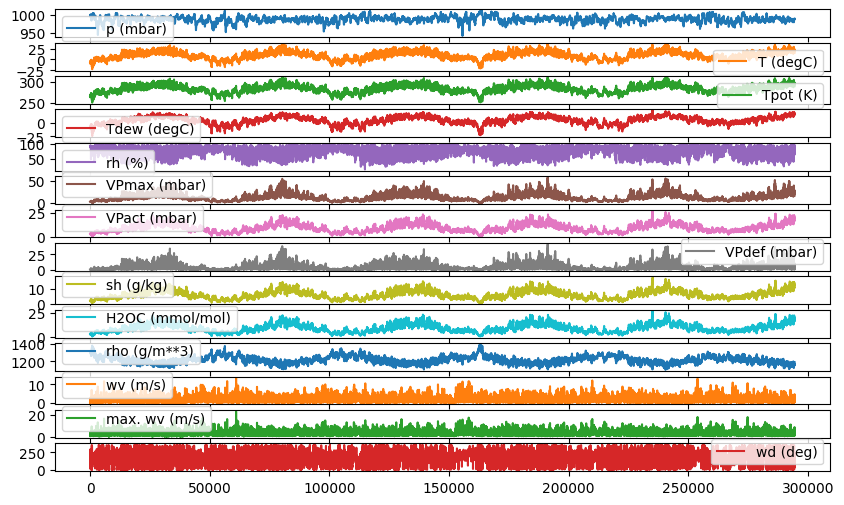

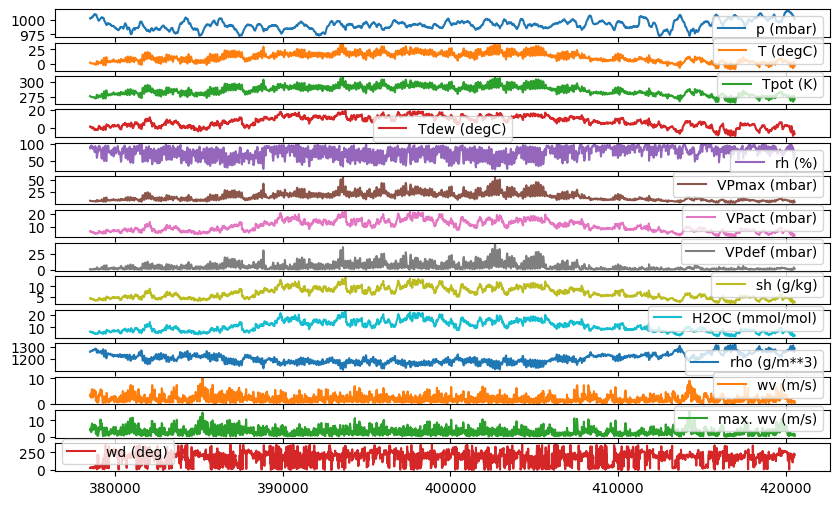

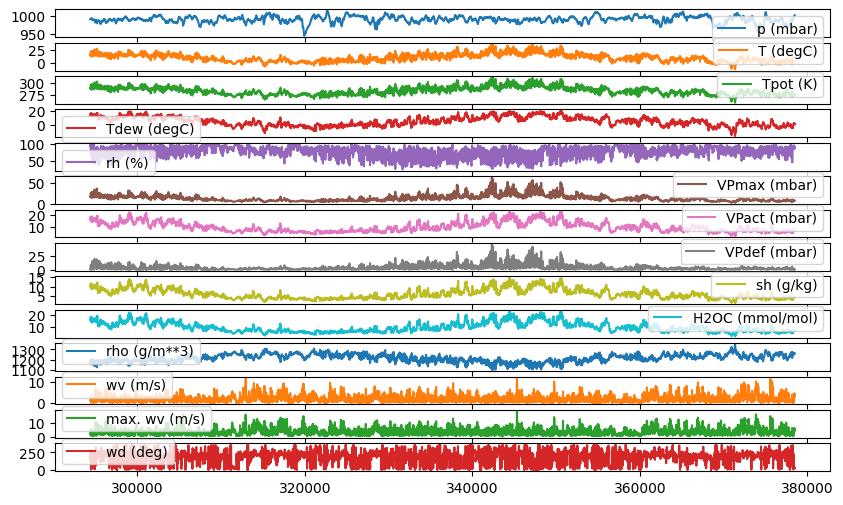

In [58]:
# lets plot the data
train_df.plot(subplots=True) # plotting the training data

test_df.plot(subplots=True) # plotting the test data

val_df.plot(subplots=True) # plotting the validation data

In [59]:
# lets normalize the data
# we will use mean and standard deviation of the training data to normalize the data
train_mean=train_df.mean() # getting the mean of the training data
train_std=train_df.std() # getting the standard deviation of the training data

# lets normalize the training data
train_df=(train_df-train_mean)/train_std # normalizing the training data

In [60]:
# lets normalize the validation data
val_df=(val_df-train_mean)/train_std # normalizing the validation data

In [61]:
# lets normalize the test data
test_df=(test_df-train_mean)/train_std # normalizing the test data

array([<AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >,
       <AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >,
       <AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >,
       <AxesSubplot: >, <AxesSubplot: >], dtype=object)

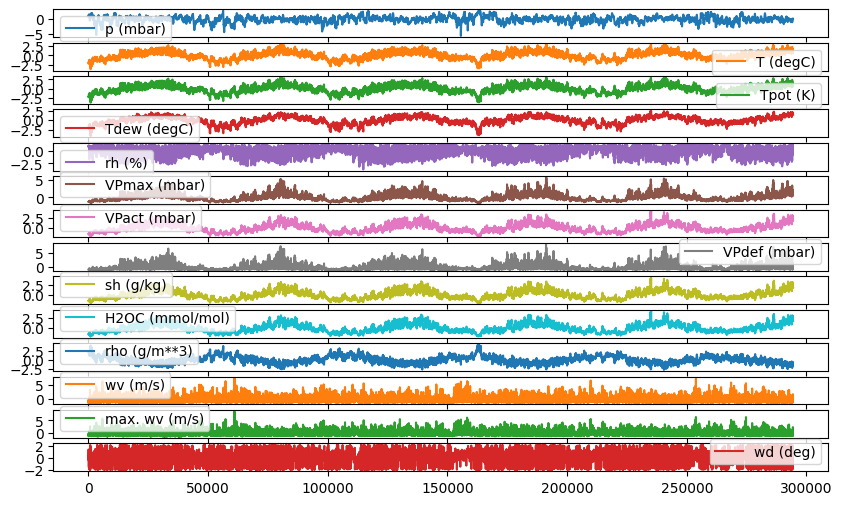

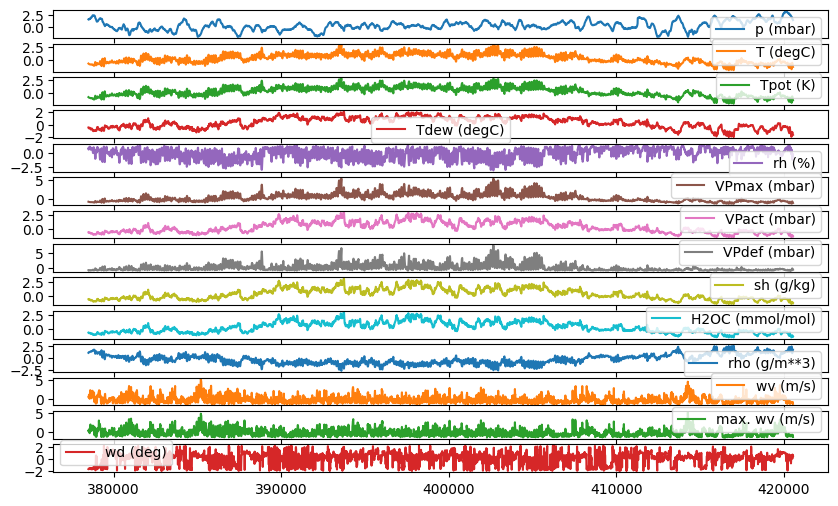

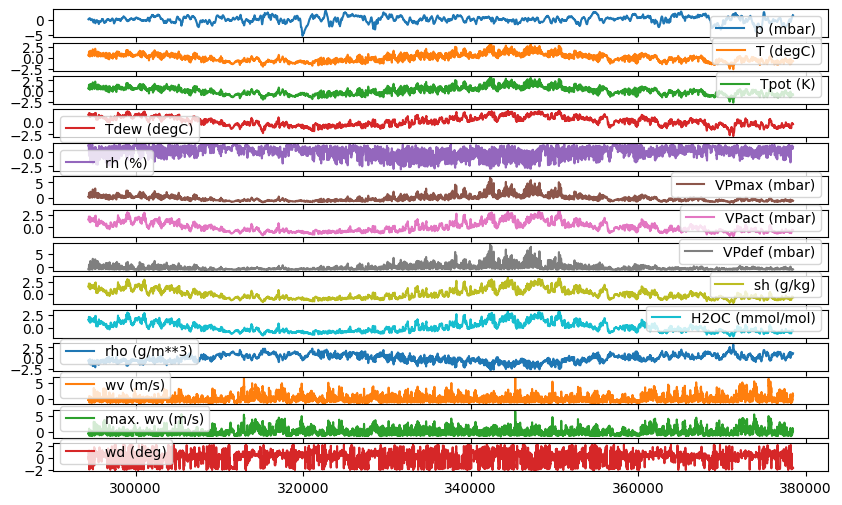

In [62]:
# lets plot the normalized data
train_df.plot(subplots=True) # plotting the training data

test_df.plot(subplots=True) # plotting the test data

val_df.plot(subplots=True) # plotting the validation data

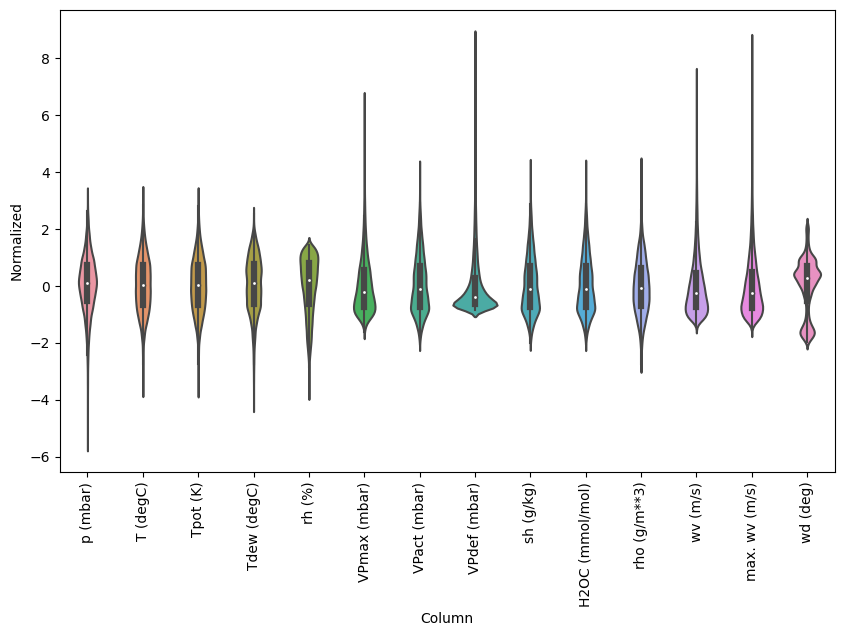

In [67]:
# lets make the model to predict the temperature
# lets make the windowed dataset
# we will use the windowed dataset to train the model
# we will use the windowed dataset to validate the model
df_std=(df-train_mean)/train_std # normalizing the data
df_std=df_std.melt(var_name='Column', value_name='Normalized') # melting the data
ax=sns.violinplot(x='Column', y='Normalized', data=df_std) # plotting the violin plot
_ = ax.set_xticklabels(df.keys(), rotation=90) # setting the xticks

In [68]:
# lets make the windowed dataset
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
    series=tf.expand_dims(series, axis=-1) # expanding the dimension of the series
    ds=tf.data.Dataset.from_tensor_slices(series) # creating the dataset
    ds=ds.window(window_size+1, shift=1, drop_remainder=True) # creating the window
    ds=ds.flat_map(lambda w: w.batch(window_size+1)) # creating the window
    ds=ds.shuffle(shuffle_buffer) # shuffling the data
    ds=ds.map(lambda w: (w[:-1], w[1:])) # mapping the data
    return ds.batch(batch_size).prefetch(1) # returning the batched data

In [69]:
# lets make the windowed dataset
window_size=64 # setting the window size
batch_size=256 # setting the batch size
shuffle_buffer_size=1000 # setting the shuffle buffer size

In [70]:
# lets make the windowed dataset for the training data
train_set=windowed_dataset(train_df['T (degC)'], window_size, batch_size, shuffle_buffer_size) # creating the windowed dataset for the training data

# lets make the windowed dataset for the validation data
val_set=windowed_dataset(val_df['T (degC)'], window_size, batch_size, shuffle_buffer_size) # creating the windowed dataset for the validation data

In [71]:
# lets make the windowed dataset for the test data
test_set=windowed_dataset(test_df['T (degC)'], window_size, batch_size, shuffle_buffer_size) # creating the windowed dataset for the test data

# lets make the model
model=tf.keras.models.Sequential([tf.keras.layers.Conv1D(filters=32, kernel_size=5, strides=1, padding='causal', activation='relu', input_shape=[None, 1]), # creating the convolutional layer
                                    tf.keras.layers.LSTM(64, return_sequences=True), # creating the LSTM layer
                                    tf.keras.layers.LSTM(64, return_sequences=True), # creating the LSTM layer
                                    tf.keras.layers.Dense(30, activation='relu'), # creating the dense layer
                                    tf.keras.layers.Dense(10, activation='relu'), # creating the dense layer
                                    tf.keras.layers.Dense(1), # creating the dense layer
                                    tf.keras.layers.Lambda(lambda x: x*400)]) # creating the lambda layer